In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

# San Diego Demographics By Tract
`sandiegodata.org-demographics-tract-1.1.1` Last Update: 2020-11-26T02:42:25

_Age, Race, Sex and Ethnicity, by tract for San Diego county_



The dataset includes three files all from the Census, detailing age and sex and race ethnicity 

## Age and Sex

The ``age_sex`` data comes from B01001 and the associated race iterations. The file combines all of the race iteration tables and adds columns for sex, race/ethnicity codes and age groups. 

THe race ethnicity codes are: 

*  white 
*  nhwhite
*  black
*  aian
*  asian
*  nhopi
*  other
*  many
*  hisp

For each of the race/ethnicity values except nhwhite and hisp, the category sums the associated 'nh_*' and 'hisp_*' categories from the raceeth table. 


## Race And Ethnicity

The  ``raceeth`` is based on the census table [C03002: Hispanic or Latino Origin by Race](https://censusreporter.org/tables/C03002/), but recormats the structure, use a code for race/ethnicity in the `raceeth` column to indicate the oricinal clumn name in the Census dataset. These codes are: 

* total: B03002_001  Total
* nonhisp: B03002_002 Not Hispanic or Latino
* nh_white: B03002_003 Not Hispanic or Latino  - White alone
* nh_black: B03002_004 Not Hispanic or Latino  - Black or African American alone
* nh_aian: B03002_005 Not Hispanic or Latino  - American Indian and Alaska Native alone
* nh_asian: B03002_006 Not Hispanic or Latino  - Asian alone
* nh_nhopi: B03002_007 Not Hispanic or Latino  - Native Hawaiian and Other Pacific Islander alone
* nh_other: B03002_008 Not Hispanic or Latino  - Some other race alone
* nh_multiple: B03002_009 Not Hispanic or Latino  - Two or more races
* nh_multiple_other: B03002_010 Not Hispanic or Latino  - Two or more races  - Two races including Some other race
* nh_multiple_more: B03002_011 Not Hispanic or Latino  - Two or more races  - Two races excluding Some other race and three or more races
* hisp: B03002_012 Hispanic or Latino
* hisp_white: B03002_013 Hispanic or Latino  - White alone
* hisp_black: B03002_014 Hispanic or Latino  - Black or African American alone
* hisp_aian: B03002_015 Hispanic or Latino  - American Indian and Alaska Native alone
* hisp_asian: B03002_016 Hispanic or Latino  - Asian alone
* hisp_nhopi: B03002_017 Hispanic or Latino  - Native Hawaiian and Other Pacific Islander alone
* hisp_other: B03002_018 Hispanic or Latino  - Some other race alone
* hisp_multiple: B03002_019 Hispanic or Latino  - Two or more races
* hisp_multiple_other: B03002_020 Hispanic or Latino  - Two or more races  - Two races including Some other race
* hisp_multiple_more: B03002_021 Hispanic or Latino  - Two or more races  - Two races excluding Some other race and three or more races

For the most part you will use the ``nh_*`` for all races, ``hisp_white`` for hispanics, and ``nh_white`` for whites.


 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [tracts](data/tracts.csv)**. San Diego county tract boundaries
* ** [age_sex](data/age_sex.csv)**. Age and sex per San Diego tract
* ** [total_populaltion](data/total_populaltion.csv)**. Total popualtion of San Diego tracts
* ** [raceeth](data/raceeth.csv)**. Race and Ethnicity for SaN Diego tracts

## References
<ul><li> <strong>tract_boundaries</string>, <em>census://2018/5/CA/tract</em>. Census Tract boundaries for tracts in California</li><li> <strong>total_popualtion</string>, <em>census://2018/5/CA/tract/B01003</em>. Total tract population</li><li> <strong>raceeth</string>, <em>census://2018/5/CA/tract/b03002</em>. Hispanic or Latino Origin by Race</li><ul>

In [4]:
pkg.resource('age_sex').dataframe().head()

,geoid,column,sex,age,min_age,max_age,raceeth,estimate,margin
0,14000US06073008331,b01001a_001,both,all,0,120,white,1929,125
1,14000US06073008331,b01001a_002,male,all,0,120,white,999,86
2,14000US06073008331,b01001a_003,male,000-005,0,5,white,49,41
3,14000US06073008331,b01001a_004,male,005-009,5,9,white,40,21
4,14000US06073008331,b01001a_005,male,010-014,10,14,white,98,58


In [5]:
pkg.resource('raceeth').dataframe()

,geoid,raceeth,estimate,margin
0,14000US06073008331,total,2524,118
1,14000US06073008331,nonhisp,2330,140
2,14000US06073008331,nh_white,1763,145
3,14000US06073008331,nh_black,0,12
4,14000US06073008331,nh_aian,0,12
...,...,...,...,...
13183,14000US06073016607,hisp_nhopi,0,17
13184,14000US06073016607,hisp_other,195,200
13185,14000US06073016607,hisp_multiple,17,27
13186,14000US06073016607,hisp_multiple_other,0,17


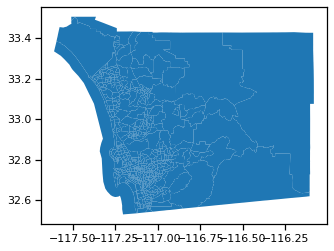

In [7]:
pkg.resource('tracts').geoframe().plot()